## Task overview

### cousrsework page:https://hackmd.io/s/SymKn8xUE
        
What crops can be associated with which regions of the world?

And is there specialisation of crops among regions/countries? 

Is this specialisation increasing or decreasing over time? 

### data page: http://www.fao.org/faostat/en/#data/QC

## Spatial analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Africa

In [2]:
africa_ori = pd.read_csv('continent\Production_Crops_E_Africa_NOFLAG.csv',encoding = 'ISO-8859-1')
africa_ori.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,13300.0,13300.0,13300.0,...,39787.0,39313.0,54485.0,52245.0,49975.0,49011.0,39050.0,40403.0,49983.0,50100.0
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,4511.0,4511.0,...,9933.0,12055.0,10457.0,9689.0,13304.0,12965.0,16601.0,18930.0,13223.0,12364.0
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,6000.0,6000.0,6000.0,...,39521.0,47393.0,56973.0,50621.0,66487.0,63545.0,64827.0,76482.0,66095.0,61943.0
3,4,Algeria,515,Apples,5312,Area harvested,ha,3400.0,3100.0,2800.0,...,33206.0,36616.0,52419.0,51080.0,48828.0,48064.0,40418.0,41011.0,46070.0,44620.0
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,45161.0,46429.0,...,78590.0,73047.0,72233.0,79112.0,81414.0,94860.0,114507.0,110086.0,108716.0,110767.0


In [3]:
# we use 'yield' as the basic type
africa_ori = africa_ori[africa_ori.Element == 'Yield']
africa_ori.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,4511.0,4511.0,...,9933.0,12055.0,10457.0,9689.0,13304.0,12965.0,16601.0,18930.0,13223.0,12364.0
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,45161.0,46429.0,...,78590.0,73047.0,72233.0,79112.0,81414.0,94860.0,114507.0,110086.0,108716.0,110767.0
7,4,Algeria,526,Apricots,5419,Yield,hg/ha,30286.0,30000.0,30000.0,...,52485.0,59461.0,40098.0,58120.0,56845.0,68194.0,56217.0,75530.0,67149.0,57980.0
10,4,Algeria,366,Artichokes,5419,Yield,hg/ha,76000.0,74000.0,80000.0,...,148824.0,145136.0,152898.0,124489.0,128736.0,186436.0,172383.0,195961.0,188489.0,196240.0
13,4,Algeria,486,Bananas,5419,Yield,hg/ha,NaN,NaN,NaN,...,92132.0,153779.0,189031.0,223409.0,257692.0,257692.0,263798.0,216804.0,226910.0,228928.0


In [4]:
africa_ori.isnull().sum()

Area Code         0
Area              0
Item Code         0
Item              0
Element Code      0
Element           0
Unit              0
Y1961           888
Y1962           887
Y1963           884
Y1964           884
Y1965           883
Y1966           876
Y1967           873
Y1968           860
Y1969           850
Y1970           842
Y1971           842
Y1972           843
Y1973           841
Y1974           832
Y1975           827
Y1976           816
Y1977           805
Y1978           799
Y1979           787
Y1980           773
Y1981           759
Y1982           748
Y1983           739
               ... 
Y1988           525
Y1989           516
Y1990           421
Y1991           390
Y1992           374
Y1993           331
Y1994           323
Y1995           306
Y1996           287
Y1997           265
Y1998           260
Y1999           253
Y2000           214
Y2001           210
Y2002           208
Y2003           204
Y2004           204
Y2005           204
Y2006           201


In [5]:
africa = africa_ori.fillna(0)

In [6]:
africa.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y1961           0
Y1962           0
Y1963           0
Y1964           0
Y1965           0
Y1966           0
Y1967           0
Y1968           0
Y1969           0
Y1970           0
Y1971           0
Y1972           0
Y1973           0
Y1974           0
Y1975           0
Y1976           0
Y1977           0
Y1978           0
Y1979           0
Y1980           0
Y1981           0
Y1982           0
Y1983           0
               ..
Y1988           0
Y1989           0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012     

In [7]:
africa.describe()

,Area Code,Item Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
count,2878.000000,2878.000000,2878.0,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,...,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03,2.878000e+03
mean,141.157054,662.916609,5419.0,3.150422e+04,3.222869e+04,3.234152e+04,3.259189e+04,3.280849e+04,3.337357e+04,3.392595e+04,...,6.213692e+04,6.342375e+04,6.365025e+04,6.472914e+04,6.613739e+04,6.650897e+04,6.701415e+04,6.748102e+04,6.651637e+04,6.744107e+04
std,73.361526,603.064807,0.0,7.326389e+04,7.401880e+04,7.148525e+04,7.415209e+04,7.379824e+04,7.864540e+04,8.017775e+04,...,1.228870e+05,1.275842e+05,1.276438e+05,1.297230e+05,1.292706e+05,1.328887e+05,1.346081e+05,1.389532e+05,1.356701e+05,1.442807e+05
min,4.000000,15.000000,5419.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,75.000000,217.000000,5419.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.474250e+03,6.551500e+03,6.738750e+03,6.686250e+03,6.997750e+03,7.043000e+03,7.041500e+03,7.047250e+03,6.842250e+03,7.091250e+03
50%,143.000000,463.000000,5419.0,5.771000e+03,6.195000e+03,6.181500e+03,6.200000e+03,6.096500e+03,6.118000e+03,6.401500e+03,...,2.133550e+04,2.162150e+04,2.215450e+04,2.214650e+04,2.332400e+04,2.303250e+04,2.353600e+04,2.353700e+04,2.353600e+04,2.347750e+04
75%,202.000000,723.000000,5419.0,4.000000e+04,4.000000e+04,4.163425e+04,4.053075e+04,4.083700e+04,4.133350e+04,4.090900e+04,...,7.479775e+04,7.617575e+04,7.672725e+04,7.830600e+04,7.834650e+04,7.935250e+04,8.224050e+04,8.122600e+04,8.000625e+04,8.118200e+04
max,277.000000,1841.000000,5419.0,1.300000e+06,1.300000e+06,1.300000e+06,1.252727e+06,1.300000e+06,1.400000e+06,1.449153e+06,...,3.385899e+06,3.673056e+06,3.795420e+06,3.797332e+06,3.827675e+06,4.084048e+06,4.267726e+06,4.538316e+06,4.334351e+06,5.056534e+06


In [8]:
# africa[list(range(5))]

In [9]:
item_af = africa['Item'].value_counts()
item_af

Vegetables, fresh nes           56
Fruit Primary                   56
Cereals,Total                   56
Cereals (Rice Milled Eqv)       56
Roots and Tubers,Total          56
Vegetables Primary              56
Oilcrops, Oil Equivalent        55
Coarse Grain, Total             55
Oilcrops, Cake Equivalent       55
Maize                           53
Pulses,Total                    53
Fruit, fresh nes                52
Groundnuts, with shell          51
Sorghum                         45
Fibre Crops Primary             44
Tomatoes                        44
Rice, paddy                     44
Pulses, nes                     44
Citrus Fruit,Total              43
Potatoes                        43
Bananas                         43
Sweet potatoes                  43
Cassava                         41
Sugar cane                      41
Millet                          40
Seed cotton                     40
Beans, dry                      38
Tobacco, unmanufactured         38
Mangoes, mangosteens

#### top 10 cnum

In [10]:
item_af[0:10]

Vegetables, fresh nes        56
Fruit Primary                56
Cereals,Total                56
Cereals (Rice Milled Eqv)    56
Roots and Tubers,Total       56
Vegetables Primary           56
Oilcrops, Oil Equivalent     55
Coarse Grain, Total          55
Oilcrops, Cake Equivalent    55
Maize                        53
Name: Item, dtype: int64

#### note: 
   <span class="mark">cnum</span> represent the top10 is defined by the the number of countries which yield the crop
            
 <span class="mark">tsum</span> represent the top10 is defined by the the values
 of all the countries in this continent contributed

In [11]:

af_top10_cnum = item_af[0:10].index.values
# top10_name1_yvalue

In [12]:
y = np.linspace(1961,2017,57)
print(y)

[1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.]


In [13]:
# yy = [Y1961, Y1962, Y1963, Y1964, Y1965, Y1966, Y1967, Y1968, Y1969, Y1970, Y1971, Y1972,
#  Y1973, Y1974, Y1975, Y1976, Y1977, Y1978, Y1979, Y1980, Y1981, Y1982, Y1983, Y1984,
#  Y1985, Y1986, Y1987, Y1988, Y1989, Y1990, Y1991, Y1992, Y1993, Y1994, Y1995, Y1996,
#  Y1997, Y1998, Y1999, Y2000, Y2001, Y2002, Y2003, Y2004, Y2005, Y2006, Y2007, Y2008,
#  Y2009, Y2010, Y2011, Y2012, Y2013, Y2014, Y2015, Y2016, Y2017,]
global year_list
year_list = ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017',]
year_list

['Y1961',
 'Y1962',
 'Y1963',
 'Y1964',
 'Y1965',
 'Y1966',
 'Y1967',
 'Y1968',
 'Y1969',
 'Y1970',
 'Y1971',
 'Y1972',
 'Y1973',
 'Y1974',
 'Y1975',
 'Y1976',
 'Y1977',
 'Y1978',
 'Y1979',
 'Y1980',
 'Y1981',
 'Y1982',
 'Y1983',
 'Y1984',
 'Y1985',
 'Y1986',
 'Y1987',
 'Y1988',
 'Y1989',
 'Y1990',
 'Y1991',
 'Y1992',
 'Y1993',
 'Y1994',
 'Y1995',
 'Y1996',
 'Y1997',
 'Y1998',
 'Y1999',
 'Y2000',
 'Y2001',
 'Y2002',
 'Y2003',
 'Y2004',
 'Y2005',
 'Y2006',
 'Y2007',
 'Y2008',
 'Y2009',
 'Y2010',
 'Y2011',
 'Y2012',
 'Y2013',
 'Y2014',
 'Y2015',
 'Y2016',
 'Y2017']

#### calculate the total volume of yielded crop

In [14]:
# this function is to calculate the total volume of yielded crop
def yield_sum(df,start = 'Y1961',end = 'Y2017'):
    global year_list
    df['Total'] = 0
    total =0
    for i in range(len(year_list)):
        if year_list[i] == start:
            s_ind = i
        elif year_list[i] == end:
            e_ind = i
    for i in range(s_ind,e_ind+1):
        df['Total'] += df[year_list[i]]
    return df


In [15]:
#now we got the 
africa_sum = yield_sum(africa)
africa_sum.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Total
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,4511.0,4511.0,...,12055.0,10457.0,9689.0,13304.0,12965.0,16601.0,18930.0,13223.0,12364.0,429607.0
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,45161.0,46429.0,...,73047.0,72233.0,79112.0,81414.0,94860.0,114507.0,110086.0,108716.0,110767.0,3455784.0
7,4,Algeria,526,Apricots,5419,Yield,hg/ha,30286.0,30000.0,30000.0,...,59461.0,40098.0,58120.0,56845.0,68194.0,56217.0,75530.0,67149.0,57980.0,2402910.0
10,4,Algeria,366,Artichokes,5419,Yield,hg/ha,76000.0,74000.0,80000.0,...,145136.0,152898.0,124489.0,128736.0,186436.0,172383.0,195961.0,188489.0,196240.0,5198833.0
13,4,Algeria,486,Bananas,5419,Yield,hg/ha,0.0,0.0,0.0,...,153779.0,189031.0,223409.0,257692.0,257692.0,263798.0,216804.0,226910.0,228928.0,4077329.0


In [16]:
africa_sum_sorted = africa_sum.sort_values(by = 'Total',ascending = False)
africa_sum_sorted

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Total
4790,130,Malawi,1804,"Citrus Fruit,Total",5419,Yield,hg/ha,50000.0,50000.0,50000.0,...,3673056.0,3795420.0,3797332.0,3827675.0,4084048.0,4267726.0,4538316.0,4334351.0,5056534.0,81818522.0
730,233,Burkina Faso,1738,Fruit Primary,5419,Yield,hg/ha,0.0,0.0,0.0,...,57966.0,58725.0,59401.0,61574.0,59645.0,60256.0,60591.0,60331.0,60522.0,70875669.0
2352,59,Egypt,156,Sugar cane,5419,Yield,hg/ha,890638.0,942745.0,920179.0,...,1163907.0,1167617.0,1153195.0,1135700.0,1141460.0,1151301.0,1153552.0,1136100.0,1127040.0,57484166.0
2630,209,Eswatini,156,Sugar cane,5419,Yield,hg/ha,1132295.0,988514.0,558173.0,...,961538.0,965275.0,970407.0,968149.0,966793.0,965437.0,964081.0,962724.0,961368.0,57296273.0
4749,130,Malawi,156,Sugar cane,5419,Yield,hg/ha,0.0,0.0,0.0,...,1083333.0,1086957.0,1086957.0,1037037.0,1074074.0,1079519.0,1079828.0,1075730.0,1076592.0,55622055.0
8839,181,Zimbabwe,156,Sugar cane,5419,Yield,hg/ha,882589.0,973833.0,766122.0,...,646403.0,662027.0,714019.0,734595.0,849694.0,894228.0,776906.0,800690.0,781082.0,54347895.0
8606,251,Zambia,156,Sugar cane,5419,Yield,hg/ha,0.0,0.0,0.0,...,1049180.0,1060606.0,1060606.0,1000000.0,1025641.0,1034759.0,1032405.0,1027377.0,1025938.0,53000630.0
6697,195,Senegal,156,Sugar cane,5419,Yield,hg/ha,0.0,0.0,0.0,...,1161111.0,1161074.0,1163528.0,1166357.0,1169137.0,1171916.0,1174696.0,1177476.0,1180256.0,46325859.0
1390,39,Chad,156,Sugar cane,5419,Yield,hg/ha,250000.0,250000.0,325000.0,...,1000000.0,1005452.0,1013066.0,1011847.0,1015581.0,1019316.0,1023050.0,1026784.0,1030519.0,44377455.0
3974,114,Kenya,156,Sugar cane,5419,Yield,hg/ha,297552.0,314799.0,321086.0,...,853027.0,830630.0,671815.0,666815.0,777307.0,888048.0,920569.0,816637.0,701780.0,44189470.0


In [17]:
for i in range(10):
#     print( str(africa_sum_sorted.iloc[i]['Area'])+str('':)+ str(africa_sum_sorted.iloc[i]['Item']) + str(africa_sum_sorted.iloc[i]['Total']))
    print(str(africa_sum_sorted.iloc[i]['Item']))

Citrus Fruit,Total
Fruit Primary
Sugar cane
Sugar cane
Sugar cane
Sugar cane
Sugar cane
Sugar cane
Sugar cane
Sugar cane


#### top 10 tsum

In [75]:
#tsum indicate it's total yield value of every countries in the continent
af_tsum = africa_sum_sorted[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
# af_tsum = af_tsum.reset_index().sort_values(by = 'Total',ascending = False)
af_tsum_sorted = af_tsum.sort_values(by = 'Total',ascending = False)
af_tsum_sorted[0:10]

,Total
Item,
Sugar cane,1.207588e+09
Fruit Primary,3.199709e+08
Bananas,2.820186e+08
Tomatoes,2.741866e+08
"Roots and Tubers,Total",2.509024e+08
Vegetables Primary,2.387124e+08
"Citrus Fruit,Total",2.368466e+08
Pineapples,2.360070e+08
"Onions, dry",2.286646e+08


Text(0.5, 1.0, 'Africa yield value top 10')

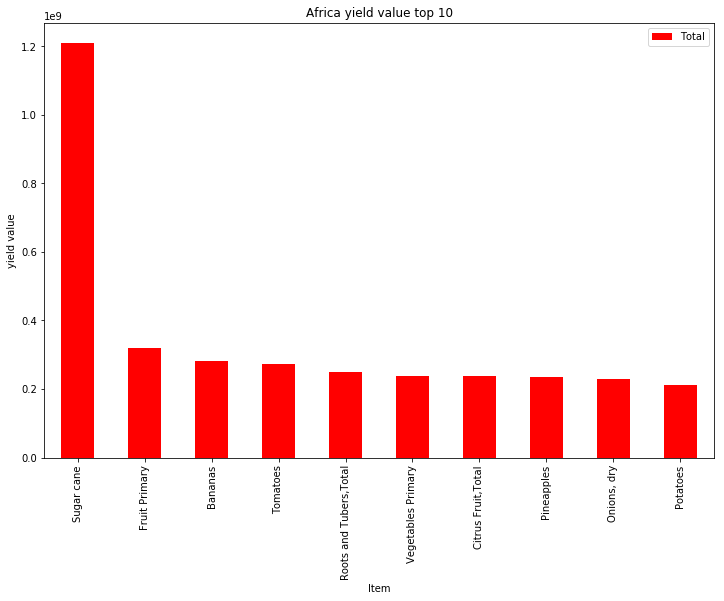

In [80]:
af_tsum_sorted[0:10].plot.bar(figsize = (12,8),color ='red')
plt.ylabel('yield value')
plt.title('Africa yield value top 10')

### Americas

In [20]:
americas_ori = pd.read_csv('continent\Production_Crops_E_americas_NOFLAG.csv',encoding = 'ISO-8859-1')
americas_ori = americas_ori[americas_ori.Element == 'Yield']
americas_ori.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,8,Antigua and Barbuda,486,Bananas,5419,Yield,hg/ha,NaN,NaN,NaN,...,96330.0,93147.0,89847.0,86454.0,71429.0,79454.0,87871.0,86655.0,85130.0,83605.0
4,8,Antigua and Barbuda,414,"Beans, green",5419,Yield,hg/ha,40000.0,40000.0,30000.0,...,38646.0,38817.0,38984.0,39149.0,40000.0,39344.0,38126.0,38240.0,38269.0,38298.0
7,8,Antigua and Barbuda,358,Cabbages and other brassicas,5419,Yield,hg/ha,40000.0,33333.0,40000.0,...,45614.0,44789.0,43954.0,43110.0,41667.0,41443.0,41498.0,40989.0,40326.0,39663.0
10,8,Antigua and Barbuda,426,Carrots and turnips,5419,Yield,hg/ha,30000.0,50000.0,40000.0,...,37588.0,36749.0,35894.0,34997.0,30928.0,33109.0,34894.0,35148.0,34830.0,34512.0
13,8,Antigua and Barbuda,125,Cassava,5419,Yield,hg/ha,33333.0,30000.0,28000.0,...,46136.0,47420.0,48684.0,49958.0,57500.0,52208.0,52204.0,53585.0,54484.0,55383.0


In [21]:
americas_ori.isnull().sum()

Area Code         0
Area              0
Item Code         0
Item              0
Element Code      0
Element           0
Unit              0
Y1961           730
Y1962           730
Y1963           730
Y1964           727
Y1965           730
Y1966           708
Y1967           709
Y1968           705
Y1969           705
Y1970           689
Y1971           687
Y1972           687
Y1973           683
Y1974           680
Y1975           677
Y1976           671
Y1977           671
Y1978           673
Y1979           659
Y1980           625
Y1981           618
Y1982           612
Y1983           606
               ... 
Y1988           325
Y1989           295
Y1990           251
Y1991           222
Y1992           221
Y1993           205
Y1994           187
Y1995           188
Y1996           181
Y1997           163
Y1998           161
Y1999           129
Y2000           119
Y2001           116
Y2002           112
Y2003           103
Y2004            92
Y2005            81
Y2006            84


In [22]:
americas = americas_ori.fillna(0)
americas.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y1961           0
Y1962           0
Y1963           0
Y1964           0
Y1965           0
Y1966           0
Y1967           0
Y1968           0
Y1969           0
Y1970           0
Y1971           0
Y1972           0
Y1973           0
Y1974           0
Y1975           0
Y1976           0
Y1977           0
Y1978           0
Y1979           0
Y1980           0
Y1981           0
Y1982           0
Y1983           0
               ..
Y1988           0
Y1989           0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012     

#### top 10 cnum

In [76]:
item_am = americas['Item'].value_counts()
top10_am_cnum = item_am[0:10]
top10_am_cnum

Vegetables Primary           43
Fruit Primary                43
Roots and Tubers,Total       42
Vegetables, fresh nes        42
Tomatoes                     41
Oilcrops, Cake Equivalent    40
Oilcrops, Oil Equivalent     40
Cereals,Total                38
Sugar cane                   38
Coarse Grain, Total          38
Name: Item, dtype: int64

In [24]:
americas_sum = yield_sum(americas)
americas_sum_sorted = americas_sum.sort_values(by = 'Total',ascending = False)
americas_sum_sorted

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Total
3955,91,Guyana,1732,"Oilcrops, Oil Equivalent",5419,Yield,hg/ha,22925333.0,21398267.0,14919750.0,...,5509.0,5478.0,7646.0,5307.0,5309.0,10457.0,0.0,0.0,0.0,115402686.0
87,8,Antigua and Barbuda,1738,Fruit Primary,5419,Yield,hg/ha,0.0,0.0,0.0,...,72285.0,70232.0,70526.0,67007.0,68901.0,70886.0,70910.0,70816.0,70723.0,110024416.0
5791,170,Peru,156,Sugar cane,5419,Yield,hg/ha,1544917.0,1532087.0,1497977.0,...,1318807.0,1280148.0,1234552.0,1278119.0,1337170.0,1260513.0,1207446.0,1121202.0,1212463.0,71978342.0
3952,91,Guyana,1841,"Oilcrops, Cake Equivalent",5419,Yield,hg/ha,14109200.0,13169467.0,9182850.0,...,3548.0,3526.0,4921.0,3418.0,3419.0,6579.0,0.0,0.0,0.0,71067264.0
3738,89,Guatemala,156,Sugar cane,5419,Yield,hg/ha,517905.0,590838.0,677953.0,...,923248.0,951065.0,839416.0,949322.0,1030749.0,1251568.0,1264313.0,1290493.0,1210119.0,50868784.0
2633,56,Dominican Republic,600,Papayas,5419,Yield,hg/ha,80031.0,80723.0,83000.0,...,2799434.0,2184242.0,2046936.0,2098087.0,2151883.0,2633731.0,2808105.0,2878626.0,2816452.0,49646697.0
6876,231,United States of America,156,Sugar cane,5419,Yield,hg/ha,993693.0,941870.0,936467.0,...,780623.0,698951.0,750762.0,800565.0,757099.0,785279.0,811535.0,800327.0,824123.0,46562773.0
1962,44,Colombia,156,Sugar cane,5419,Yield,hg/ha,456104.0,496515.0,398808.0,...,967049.0,933603.0,913435.0,840713.0,858592.0,951236.0,882601.0,863992.0,871645.0,44449695.0
3108,60,El Salvador,156,Sugar cane,5419,Yield,hg/ha,365673.0,396154.0,429435.0,...,918961.0,813363.0,856640.0,885413.0,928426.0,850006.0,808088.0,910476.0,880732.0,42796151.0
5923,177,Puerto Rico,568,"Melons, other (inc.cantaloupes)",5419,Yield,hg/ha,0.0,0.0,0.0,...,347118.0,309786.0,272455.0,420188.0,266467.0,214968.0,95649.0,54427.0,74215.0,41501778.0


#### top 10 tsum

In [25]:
am_tsum = americas_sum_sorted[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
# am_tsum = am_tsum.reset_index().sort_values(by = 'Total',ascending = False)
am_tsum_sorted = am_tsum.sort_values(by = 'Total',ascending = False)
am_tsum_sorted[0:10]

,Total
Item,
Sugar cane,1.161909e+09
Fruit Primary,4.831099e+08
Tomatoes,4.412582e+08
Bananas,3.819256e+08
Pineapples,3.331139e+08
Papayas,3.154617e+08
Cabbages and other brassicas,3.089262e+08
Vegetables Primary,2.624778e+08
"Vegetables, fresh nes",2.603235e+08


Text(0.5, 1.0, 'america yield value top 10')

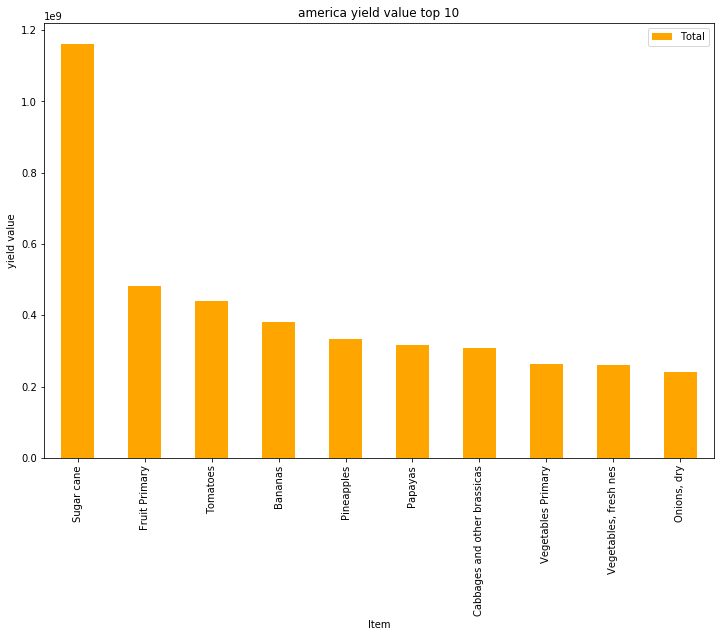

In [85]:
am_tsum_sorted[0:10].plot.bar(figsize = (12,8),color = 'orange')
plt.ylabel('yield value')
plt.title('america yield value top 10')

### Asia

In [27]:
asia_ori = pd.read_csv('continent\Production_Crops_E_asia_NOFLAG.csv',encoding = 'ISO-8859-1')
asia_ori = asia_ori[asia_ori.Element == 'Yield']
asia_ori.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0,6830.0
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.0,68018.0,68018.0,...,80087.0,85105.0,70000.0,70000.0,76519.0,76005.0,73000.0,68824.0,72762.0,65184.0
10,2,Afghanistan,526,Apricots,5419,Yield,hg/ha,66390.0,66390.0,66390.0,...,74448.0,73439.0,80000.0,81725.0,100000.0,99944.0,99944.0,96189.0,20819.0,55175.0
13,2,Afghanistan,44,Barley,5419,Yield,hg/ha,10800.0,10800.0,10800.0,...,14110.0,18202.0,20613.0,16100.0,18000.0,18489.0,15213.0,14291.0,13770.0,13933.0


In [28]:
asia = asia_ori.fillna(0)
asia.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y1961           0
Y1962           0
Y1963           0
Y1964           0
Y1965           0
Y1966           0
Y1967           0
Y1968           0
Y1969           0
Y1970           0
Y1971           0
Y1972           0
Y1973           0
Y1974           0
Y1975           0
Y1976           0
Y1977           0
Y1978           0
Y1979           0
Y1980           0
Y1981           0
Y1982           0
Y1983           0
               ..
Y1988           0
Y1989           0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012     

#### top 10 cnum

In [77]:
item_as = asia['Item'].value_counts()
top10_as_cnum = item_as[0:10]
top10_as_cnum

Vegetables, fresh nes        50
Fruit Primary                50
Roots and Tubers,Total       50
Vegetables Primary           50
Cereals (Rice Milled Eqv)    48
Cereals,Total                48
Fruit, fresh nes             47
Coarse Grain, Total          46
Oilcrops, Oil Equivalent     45
Oilcrops, Cake Equivalent    44
Name: Item, dtype: int64

#### top 10 tsum

In [30]:
asia_sum = yield_sum(asia)
asia_sum_sorted = asia_sum.sort_values(by = 'Total',ascending = False)
as_tsum = asia_sum_sorted[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
# as_tsum = as_tsum.reset_index().sort_values(by = 'Total',ascending = False)
as_tsum_sorted = as_tsum.sort_values(by = 'Total',ascending = False)
as_tsum_sorted[0:10]

,Total
Item,
Sugar cane,600983926.0
Tomatoes,505704651.0
Cucumbers and gherkins,417068665.0
Cabbages and other brassicas,416687456.0
Vegetables Primary,381902582.0
"Roots and Tubers,Total",363257769.0
"Vegetables, fresh nes",344549495.0
Watermelons,340857753.0
Potatoes,334967085.0


Text(0.5, 1.0, 'asrica yield value top 10')

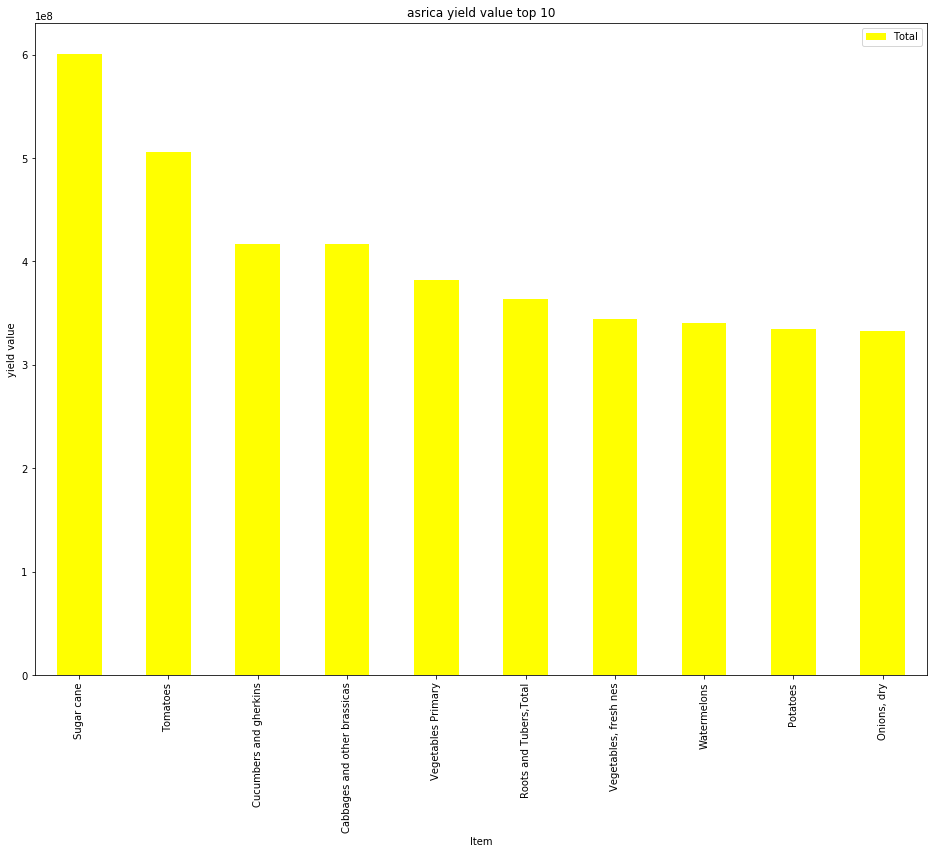

In [31]:
as_tsum_sorted[0:10].plot.bar(figsize = (16,12),color = 'yellow')
plt.ylabel('yield value')
plt.title('asrica yield value top 10')

### Europe

In [32]:
europe_ori = pd.read_csv('continent\Production_Crops_E_europe_NOFLAG.csv',encoding = 'ISO-8859-1')
europe_ori = europe_ori[europe_ori.Element == 'Yield']
europe_ori.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,3,Albania,515,Apples,5419,Yield,hg/ha,NaN,NaN,NaN,...,69231.0,94404.0,139561.0,185507.0,191718.0,197316.0,212426.0,228859.0,240028.0,221656.0
4,3,Albania,526,Apricots,5419,Yield,hg/ha,NaN,NaN,NaN,...,120690.0,128333.0,126756.0,130000.0,147176.0,139683.0,129375.0,152533.0,159325.0,154685.0
7,3,Albania,44,Barley,5419,Yield,hg/ha,10224.0,8405.0,8770.0,...,25714.0,26471.0,29200.0,30634.0,28000.0,27880.0,27007.0,28000.0,28995.0,29478.0
10,3,Albania,176,"Beans, dry",5419,Yield,hg/ha,7059.0,7031.0,7008.0,...,15245.0,16429.0,17518.0,17569.0,18493.0,19718.0,20548.0,18792.0,18120.0,16256.0
13,3,Albania,414,"Beans, green",5419,Yield,hg/ha,NaN,NaN,NaN,...,102158.0,117581.0,116775.0,102500.0,98824.0,117263.0,125763.0,130216.0,126370.0,121277.0


In [33]:
europe = europe_ori.fillna(0)
europe.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y1961           0
Y1962           0
Y1963           0
Y1964           0
Y1965           0
Y1966           0
Y1967           0
Y1968           0
Y1969           0
Y1970           0
Y1971           0
Y1972           0
Y1973           0
Y1974           0
Y1975           0
Y1976           0
Y1977           0
Y1978           0
Y1979           0
Y1980           0
Y1981           0
Y1982           0
Y1983           0
               ..
Y1988           0
Y1989           0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012     

#### top 10 cnum

In [78]:
item_eu = europe['Item'].value_counts()
top10_eu_cnum = item_eu[0:10]
top10_eu_cnum

Roots and Tubers,Total          45
Potatoes                        45
Tomatoes                        44
Vegetables Primary              44
Cabbages and other brassicas    44
Barley                          43
Cereals (Rice Milled Eqv)       43
Wheat                           43
Fruit Primary                   43
Oilcrops, Oil Equivalent        43
Name: Item, dtype: int64

#### top 10 tsum

In [35]:
europe_sum = yield_sum(europe)
europe_sum_sorted = europe_sum.sort_values(by = 'Total',ascending = False)
eu_tsum = europe_sum_sorted[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
# eu_tsum = eu_tsum.reset_index().sort_values(by = 'Total',eucending = False)
eu_tsum_sorted = eu_tsum.sort_values(by = 'Total',ascending = False)
eu_tsum_sorted[0:10]

,Total
Item,
Fruit Primary,3.667053e+09
Tomatoes,1.758332e+09
Mushrooms and truffles,1.643907e+09
Cucumbers and gherkins,1.315344e+09
Sugar beet,6.617865e+08
Carrots and turnips,5.163675e+08
Cabbages and other brassicas,4.953161e+08
Vegetables Primary,4.018023e+08
Potatoes,3.896664e+08


Text(0.5, 1.0, 'eurica yield value top 10')

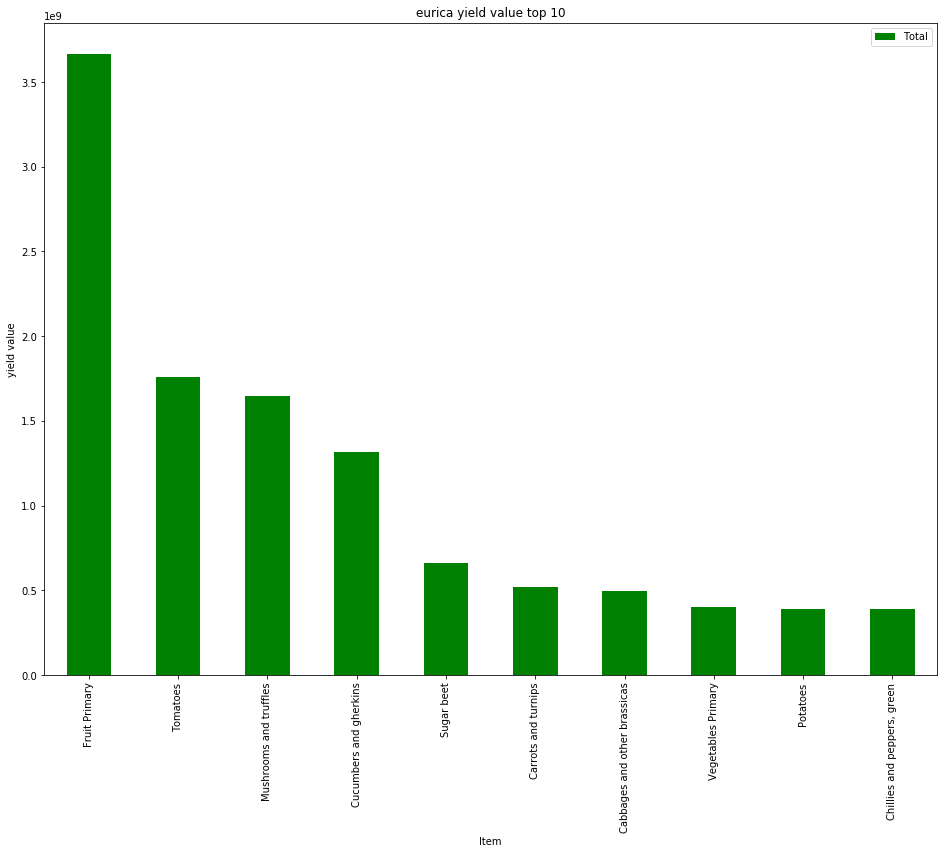

In [36]:
eu_tsum_sorted[0:10].plot.bar(figsize = (16,12),color = 'green')
plt.ylabel('yield value')
plt.title('eurica yield value top 10')

### Oceania

In [37]:
oceania_ori = pd.read_csv('continent\Production_Crops_E_oceania_NOFLAG.csv',encoding = 'ISO-8859-1')
oceania_ori = oceania_ori[oceania_ori.Element == 'Yield']
oceania_ori

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,5,American Samoa,486,Bananas,5419,Yield,hg/ha,12000.0,12000.0,14400.0,...,23904.0,23822.0,23738.0,23651.0,23243.0,23443.0,23566.0,23635.0,23605.0,23574.0
4,5,American Samoa,414,"Beans, green",5419,Yield,hg/ha,NaN,NaN,NaN,...,30100.0,30070.0,30034.0,29995.0,30000.0,29821.0,29424.0,29807.0,29656.0,29506.0
7,5,American Samoa,358,Cabbages and other brassicas,5419,Yield,hg/ha,NaN,NaN,NaN,...,38117.0,36394.0,34687.0,32994.0,31429.0,29460.0,27272.0,31051.0,29587.0,28122.0
10,5,American Samoa,125,Cassava,5419,Yield,hg/ha,133333.0,133333.0,136667.0,...,57776.0,57227.0,56641.0,56089.0,57143.0,56667.0,55836.0,56314.0,57128.0,57071.0
13,5,American Samoa,661,"Cocoa, beans",5419,Yield,hg/ha,794.0,875.0,1000.0,...,608.0,576.0,556.0,555.0,553.0,552.0,551.0,550.0,548.0,547.0
16,5,American Samoa,249,Coconuts,5419,Yield,hg/ha,17250.0,19768.0,22500.0,...,24835.0,26275.0,26023.0,26283.0,26415.0,27778.0,27615.0,27888.0,28394.0,28804.0
19,5,American Samoa,397,Cucumbers and gherkins,5419,Yield,hg/ha,NaN,NaN,NaN,...,47439.0,47997.0,48550.0,49098.0,50000.0,50057.0,47739.0,48154.0,48173.0,48192.0
22,5,American Samoa,399,Eggplants (aubergines),5419,Yield,hg/ha,NaN,NaN,NaN,...,45603.0,45571.0,45537.0,45501.0,45455.0,45421.0,45445.0,45700.0,45683.0,45666.0
26,5,American Samoa,619,"Fruit, fresh nes",5419,Yield,hg/ha,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,5,American Samoa,446,"Maize, green",5419,Yield,hg/ha,20000.0,20000.0,20000.0,...,66078.0,65705.0,65332.0,64955.0,56667.0,64230.0,64368.0,64276.0,63893.0,63510.0


In [38]:
oceania = oceania_ori.fillna(0)
oceania.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y1961           0
Y1962           0
Y1963           0
Y1964           0
Y1965           0
Y1966           0
Y1967           0
Y1968           0
Y1969           0
Y1970           0
Y1971           0
Y1972           0
Y1973           0
Y1974           0
Y1975           0
Y1976           0
Y1977           0
Y1978           0
Y1979           0
Y1980           0
Y1981           0
Y1982           0
Y1983           0
               ..
Y1988           0
Y1989           0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012     

#### top 10 cnum

In [79]:
item_as = oceania['Item'].value_counts()
# top10_oc_cnum = item_as[0:10].index.values
top10_oc_cnum = item_as[0:10]
top10_oc_cnum

Oilcrops, Cake Equivalent    22
Oilcrops, Oil Equivalent     22
Fruit Primary                21
Coconuts                     20
Vegetables Primary           20
Vegetables, fresh nes        20
Roots and Tubers,Total       19
Bananas                      18
Fruit, fresh nes             15
Cassava                      13
Name: Item, dtype: int64

#### top 10 tsum

In [40]:
oceania_sum = yield_sum(oceania)
oceania_sum_sorted = oceania_sum.sort_values(by = 'Total',ascending = False)
oc_tsum = oceania_sum_sorted[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
# oc_tsum = oc_tsum.reset_index().sort_values(by = 'Total',occending = False)
oc_tsum_sorted = oc_tsum.sort_values(by = 'Total',ascending = False)
oc_tsum_sorted[0:10]

,Total
Item,
Mushrooms and truffles,282304445.0
Sugar cane,163791839.0
"Roots and Tubers,Total",126165918.0
"Vegetables, fresh nes",112750398.0
Tomatoes,109701336.0
Vegetables Primary,101990786.0
Fruit Primary,94602727.0
"Oilcrops, Oil Equivalent",79848824.0
Cassava,78655688.0


Text(0.5, 1.0, 'ocrica yield value top 10')

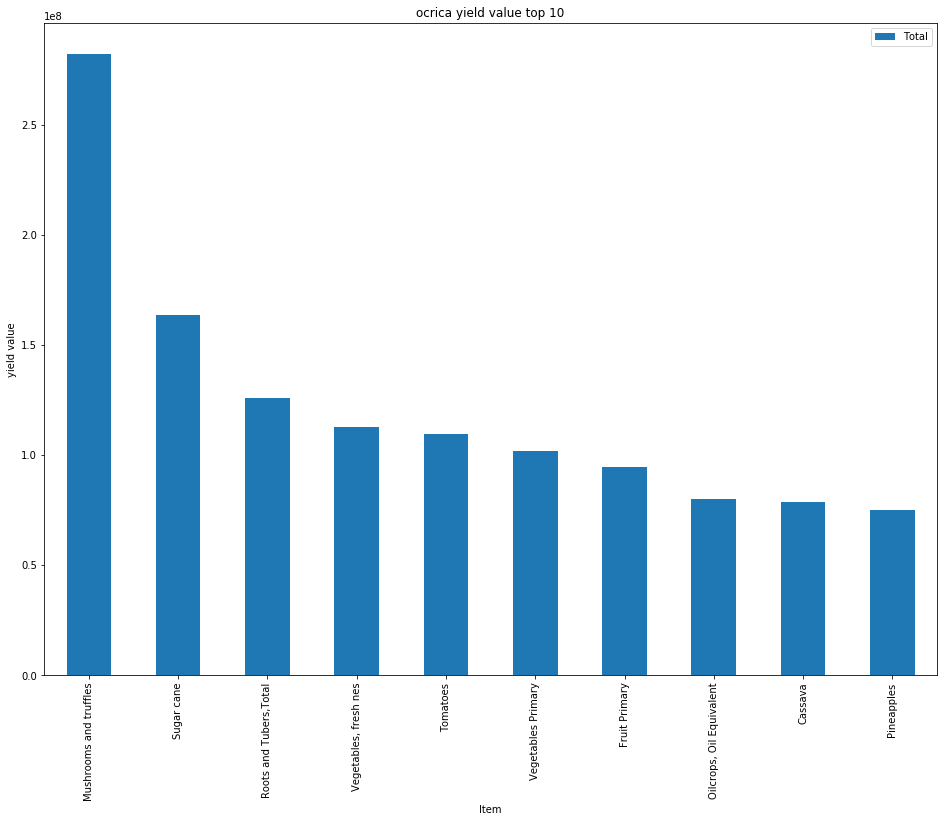

In [41]:
oc_tsum_sorted[0:10].plot.bar(figsize = (16,12))
plt.ylabel('yield value')
plt.title('ocrica yield value top 10')

## Temporal analysis

In [42]:
def Sorted_sum(df):
    aa = df.sort_values(by = 'Total',ascending = False)
    bb = aa[['Item','Total']].groupby(by = ['Item'],sort =True).sum()
    cc = bb.sort_values(by = 'Total',ascending = False)
    return cc

### top yield crops change trend
let's first look at how it changed from 2013 to 2017 and 1961 to 2012
(last five years and previous)

#### africa

In [43]:
af_pre = yield_sum(africa,start= 'Y1961',end = 'Y2012')
af_pre_sum = Sorted_sum(af_pre)
af_now = yield_sum(africa,start= 'Y2013',end = 'Y2017')
af_now_sum = Sorted_sum(af_now)
print(str('from 1961 to 2012, top 10 of af is: '))
print(af_pre_sum[0:10])
print('\n'+ str('from 2013 to 2017, top 10 of af is: '))
print(af_now_sum[0:10])

from 1961 to 2012, top 10 of af is: 
                               Total
Item                                
Sugar cane              1.094422e+09
Fruit Primary           2.964795e+08
Bananas                 2.495265e+08
Tomatoes                2.346244e+08
Roots and Tubers,Total  2.214456e+08
Vegetables Primary      2.130176e+08
Pineapples              2.073994e+08
Onions, dry             1.999017e+08
Citrus Fruit,Total      1.936433e+08
Vegetables, fresh nes   1.873325e+08

from 2013 to 2017, top 10 of af is: 
                                    Total
Item                                     
Sugar cane                    113166004.0
Citrus Fruit,Total             43203322.0
Tomatoes                       39562186.0
Bananas                        32492076.0
Roots and Tubers,Total         29456825.0
Onions, dry                    28762868.0
Pineapples                     28607519.0
Cabbages and other brassicas   27465138.0
Potatoes                       26836427.0
Vegetables Primary 

#### Americas

In [44]:
am_pre = yield_sum(americas,start= 'Y1961',end = 'Y2012')
am_pre_sum = Sorted_sum(am_pre)
am_now = yield_sum(americas,start= 'Y2013',end = 'Y2017')
am_now_sum = Sorted_sum(am_now)
print(str('from 1961 to 2012, top 10 of am is: '))
print(am_pre_sum[0:10])
print('\n'+ str('from 2013 to 2017, top 10 of am is: '))
print(am_now_sum[0:10])

from 1961 to 2012, top 10 of am is: 
                                     Total
Item                                      
Sugar cane                    1.062558e+09
Fruit Primary                 4.524118e+08
Tomatoes                      3.785861e+08
Bananas                       3.413854e+08
Pineapples                    2.926042e+08
Cabbages and other brassicas  2.711052e+08
Papayas                       2.664531e+08
Vegetables, fresh nes         2.334035e+08
Vegetables Primary            2.322878e+08
Roots and Tubers,Total        2.153929e+08

from 2013 to 2017, top 10 of am is: 
                                   Total
Item                                    
Sugar cane                    99351024.0
Tomatoes                      62672149.0
Papayas                       49008608.0
Bananas                       40540278.0
Pineapples                    40509659.0
Cabbages and other brassicas  37820990.0
Watermelons                   30791470.0
Fruit Primary                 30698128.0

#### Asia

In [45]:
as_pre = yield_sum(asia,start= 'Y1961',end = 'Y2012')
as_pre_sum = Sorted_sum(as_pre)
as_now = yield_sum(asia,start= 'Y2013',end = 'Y2017')
as_now_sum = Sorted_sum(as_now)
print(str('from 1961 to 2012, top 10 of as is: '))
print(as_pre_sum[0:10])
print('\n'+ str('from 2013 to 2017, top 10 of as is: '))
print(as_now_sum[0:10])

from 1961 to 2012, top 10 of as is: 
                                    Total
Item                                     
Sugar cane                    543185084.0
Tomatoes                      421942723.0
Cabbages and other brassicas  355075114.0
Cucumbers and gherkins        346645539.0
Vegetables Primary            331812463.0
Roots and Tubers,Total        312915793.0
Vegetables, fresh nes         303038825.0
Watermelons                   289746910.0
Potatoes                      288085238.0
Onions, dry                   287352364.0

from 2013 to 2017, top 10 of as is: 
                                   Total
Item                                    
Tomatoes                      83761928.0
Cucumbers and gherkins        70423126.0
Cabbages and other brassicas  61612342.0
Sugar cane                    57798842.0
Watermelons                   51110843.0
Roots and Tubers,Total        50341976.0
Vegetables Primary            50090119.0
Potatoes                      46881847.0
Carrots and

#### Europe

In [46]:
eu_pre = yield_sum(europe,start= 'Y1961',end = 'Y2012')
eu_pre_sum = Sorted_sum(eu_pre)
eu_now = yield_sum(europe,start= 'Y2013',end = 'Y2017')
eu_now_sum = Sorted_sum(eu_now)
print(str('from 1961 to 2012, top 10 of eu is: '))
print(eu_pre_sum[0:10])
print('\n'+ str('from 2013 to 2017, top 10 of eu is: '))
print(eu_now_sum[0:10])

from 1961 to 2012, top 10 of eu is: 
                                     Total
Item                                      
Fruit Primary                 3.646249e+09
Tomatoes                      1.479243e+09
Mushrooms and truffles        1.320648e+09
Cucumbers and gherkins        1.085677e+09
Sugar beet                    5.750591e+08
Carrots and turnips           4.449293e+08
Cabbages and other brassicas  4.358833e+08
Vegetables Primary            3.491055e+08
Potatoes                      3.396023e+08
Roots and Tubers,Total        3.391356e+08

from 2013 to 2017, top 10 of eu is: 
                                    Total
Item                                     
Mushrooms and truffles        323258613.0
Tomatoes                      279089484.0
Cucumbers and gherkins        229666983.0
Sugar beet                     86727419.0
Chillies and peppers, green    79504762.0
Eggplants (aubergines)         76814405.0
Carrots and turnips            71438191.0
Cabbages and other brassicas   

#### Oceania

In [74]:
oc_pre = yield_sum(oceania,start= 'Y1961',end = 'Y2012')
oc_pre_sum = Sorted_sum(oc_pre)
oc_now = yield_sum(oceania,start= 'Y2013',end = 'Y2017')
oc_now_sum = Sorted_sum(oc_now)
print(str('from 1961 to 2012, top 10 of oc is: '))
print(oc_pre_sum[0:10])
print('\n'+ str('from 2013 to 2017, top 10 of oc is: '))
print(oc_now_sum[0:10])

from 1961 to 2012, top 10 of oc is: 
                                Total
Item                                 
Mushrooms and truffles    257119860.0
Sugar cane                149963695.0
Roots and Tubers,Total    114447212.0
Vegetables, fresh nes     102634989.0
Tomatoes                   95185732.0
Vegetables Primary         92280396.0
Fruit Primary              86059251.0
Oilcrops, Oil Equivalent   79569817.0
Cassava                    70890730.0
Pineapples                 67979543.0

from 2013 to 2017, top 10 of oc is: 
                             Total
Item                              
Mushrooms and truffles  25184585.0
Tomatoes                14515604.0
Sugar cane              13828144.0
Roots and Tubers,Total  11718706.0
Vegetables, fresh nes   10115409.0
Vegetables Primary       9710390.0
Fruit Primary            8543476.0
Cassava                  7764958.0
Pineapples               6970709.0
Watermelons              6840824.0


### plot

In [72]:
eu_pre = yield_sum(europe,start= 'Y2008',end = 'Y2012')
eu_pre_sum = Sorted_sum(eu_pre)
attr1_eu = list(eu_pre_sum.index[0:10])
v1_eu = list(eu_pre_sum.Total[0:10])
attr1_eu 

['Mushrooms and truffles',
 'Tomatoes',
 'Cucumbers and gherkins',
 'Sugar beet',
 'Chillies and peppers, green',
 'Carrots and turnips',
 'Eggplants (aubergines)',
 'Cabbages and other brassicas',
 'Vegetables Primary',
 'Potatoes']

In [73]:
attr2_eu = list(eu_now_sum.index[0:10])
v2_eu = list(eu_now_sum.Total[0:10])
attr2_eu
# attr2_eu = list(eu_now_sum.index)
# v2_eu = list(eu_now_sum.Total)

['Mushrooms and truffles',
 'Tomatoes',
 'Cucumbers and gherkins',
 'Sugar beet',
 'Chillies and peppers, green',
 'Eggplants (aubergines)',
 'Carrots and turnips',
 'Cabbages and other brassicas',
 'Vegetables Primary',
 'Potatoes']

In [62]:
from pyecharts import Bar
bar = Bar("Europe")
bar.add("2008 to 2012", attr1_eu, v1_eu, is_stack=True)
bar.add("2013 to 2017", attr2_eu, v2_eu, is_stack=True)
bar

#### pie plot

In [63]:
from pyecharts import Pie
attr2_af = list(af_now_sum.index)
v2_af = list(af_now_sum.Total)
pie = Pie("africa last 5 years yield all")
pie.add("", attr2_af, v2_af, is_label_show=True,legend_pos="bottom",)
pie

In [83]:
attr2_af = list(af_now_sum.index[0:10])
v2_af = list(af_now_sum.Total[0:10])
pie = Pie("africa last 5 years yield top10")
pie.add("", attr2_af, v2_af,     
    center=[50, 50],
    is_random=True,
    radius=[30, 75],
    rosetype="radius",
    is_label_show=True,
    legend_pos="bottom",)
pie

In [65]:
attr2_am = list(am_now_sum.index)
v2_am = list(am_now_sum.Total)
pie = Pie("america last 5 years yield all")
pie.add("", attr2_am, v2_am, is_label_show=True,legend_pos="bottom",)
pie

In [86]:
attr2_am = list(am_now_sum.index[0:10])
v2_am = list(am_now_sum.Total[0:10])
pie = Pie("america last 5 years yield top10")
pie.add("", attr2_am, v2_am,     
    center=[50, 50],
    is_random=True,
    radius=[30, 75],
    rosetype="radius",
    is_label_show=True,
    legend_pos="bottom",)
pie

In [66]:
attr2_as = list(as_now_sum.index)
v2_as = list(as_now_sum.Total)
pie = Pie("asia last 5 years yield all")
pie.add("", attr2_as, v2_as, is_label_show=True,legend_pos="bottom",)
pie

In [88]:
attr2_as = list(as_now_sum.index[0:10])
v2_as = list(as_now_sum.Total[0:10])
pie = Pie("asia last 5 years yield top10")
pie.add("", attr2_as, v2_as,     
    center=[40, 50],
    is_random=True,
    radius=[30, 75],
    rosetype="radius",
    is_label_show=True,
    legend_pos="bottom",)
pie

In [68]:

pie = Pie("Europe last 5 years yield all")
pie.add("", attr2_eu, v2_eu, is_label_show=True,legend_pos="bottom",)
pie

In [87]:
attr2_eu = list(eu_now_sum.index[0:10])
v2_eu = list(eu_now_sum.Total[0:10])
pie = Pie("Europe last 5 years yield top10")
pie.add("", attr2_eu, v2_eu,     
    center=[50, 50],
    is_random=True,
    radius=[30, 75],
    rosetype="radius",
    is_label_show=True,
    legend_pos="bottom",)
pie

In [70]:
attr2_oc = list(oc_now_sum.index)
v2_oc = list(oc_now_sum.Total)
pie = Pie("ocerica last 5 years yield all")
pie.add("", attr2_oc, v2_oc, is_label_show=True,legend_pos="bottom",)
pie

In [89]:
attr2_oc = list(oc_now_sum.index[0:10])
v2_oc = list(oc_now_sum.Total[0:10])
pie = Pie("Oceania last 5 years yield top10")
pie.add("", attr2_oc, v2_oc,     
    center=[50, 50],
    is_random=True,
    radius=[30, 75],
    rosetype="radius",
    is_label_show=True,
    legend_pos="bottom",)
pie

In [127]:
from pyecharts import Pie
from pyecharts import Style
pie = Pie('Maximum crop yields on different continents',  title_pos='bottom')
style = Style()
pie_style = style.add(
    label_pos="center",
    is_label_show=True,
    label_text_color=None,
    legend_pos="left"
)

pie.add(
    "", ["Sugarcane", "Cirtrus",'other'], [11.7, 4.5,83.8], center=[10, 30], radius=[25, 30], **pie_style,
)
pie.add(
    "", ["Sugarcane", "Tomatoes",'other'], [8.0, 5.0,87.0], center=[30, 30], radius=[25, 30], **pie_style
)
pie.add(
    "", ["Tomatoes", "Cucumber","other"], [5.0, 4.2,90.8], center=[50, 30], radius=[25, 30], **pie_style
)
pie.add(
    "", ["Mushroom", "Tomatoes","other"], [14.8, 12.8,72.4], center=[70, 30], radius=[25, 30], **pie_style
)
pie.add(
    "", ["Mushroom", "tomatoes",'other'], [9.1, 5.3,83.6], center=[90, 30], radius=[25, 30], **pie_style

)
pie

#### network map

In [ ]:
import mpl_toolkits

In [ ]:
from mpl_toolkits.basemap import Basemap as Basemap

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

# position in decimal lat/lon
lats=[37.96,42.82]
lons=[-121.29,-73.95]
# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

###  Better visualisation: china trend

In [90]:
# from pyecharts import Bar3D

# o_data = pd .read_excel('xls_Production_Crops_E_All_Data_(Normalized).xlsx') 
# o_data = o_data[(o_data['Element'] == 'Yield') & (o_data['Area'] == 'China' )]
# a = np.linspace(1997,2016,20)
# a =list(a.astype(int))
# x_axis = a
# print(len(x_axis))
# y_axis = [
# #     'Wheat','Watermelons','Grapes','Pineapples'
#     'Wheat','Grapes','Apples','Watermelons'
#     ]
# print(len(y_axis))

# data = [
#         [0, 0, 5], [0, 1, 1], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0],
#     [0, 6, 0], [0, 7, 0], [0, 8, 0], [0, 9, 0], [0, 10, 0], [0, 11, 2],
#     [0, 12, 4], [0, 13, 1], [0, 14, 1], [0, 15, 3], [0, 16, 4], [0, 17, 6],
#     [0, 18, 4], [0, 19, 4],
#     [1, 0, 7], [1, 1, 0], [1, 2, 0], [1, 3, 0], [1, 4, 0], [1, 5, 0],
#     [1, 6, 0], [1, 7, 0], [1, 8, 0], [1, 9, 0], [1, 10, 5], [1, 11, 2],
#     [1, 12, 2], [1, 13, 6], [1, 14, 9], [1, 15, 11], [1, 16, 6], [1, 17, 7],
#     [1, 18, 8], [1, 19, 12], 
#     [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 0], [2, 5, 0],
#     [2, 6, 0], [2, 7, 0], [2, 8, 0], [2, 9, 0], [2, 10, 3], [2, 11, 2],
#     [2, 12, 1], [2, 13, 9], [2, 14, 8], [2, 15, 10], [2, 16, 6], [2, 17, 5],
#     [2, 18, 5], [2, 19, 5], 
#     [3, 0, 7], [3, 1, 3], [3, 2, 0], [3, 3, 0], [3, 4, 0], [3, 5, 0],
#     [3, 6, 0], [3, 7, 0], [3,8,0],[3, 9, 0], [3, 10, 5], [3, 11, 4],
#     [3, 12, 7], [3, 13, 14], [3, 14, 13], [3, 15, 12], [3, 16, 9], [3, 17, 5],
#     [3, 18, 5], [3, 19, 10], 

# ]

# # for i in range(len(x_axis)):
# #     for j in range(len(y_axis)):
# #         xx= o_data[(o_data['Item']==y_axis[j]) & (o_data['Year'] == x_axis[i])]['Value'].values/1000
# #         data[j+i*4][2] = xx[0]
# for j in range(len(y_axis)):
#     for i in range(len(x_axis)):
#         xx= o_data[(o_data['Item']==y_axis[j]) & (o_data['Year'] == x_axis[i])]['Value'].values/1000
#         data[j*20+i][2] = xx[0]
# data


# bar3d = Bar3D("China 3D yield", width=1200, height=600)
# range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
#                '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
# bar3d.add(
#     "",
#     x_axis,
#     y_axis,
#     [[d[1], d[0], d[2]] for d in data],
#     is_visualmap=True,
#     visual_range=[0, 400],
#     visual_range_color=range_color,
#     grid3d_width=200,
#     grid3d_depth=80,
#     grid3d_shading="lambert",
#     is_grid3d_rotate=True,
# )
# # bar3d.render()
# bar3d

20
4


## weather analysis

In [100]:
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing

In [96]:
weather = pd.read_excel("weather_country.xls")
weather.head()

,Year,Country,Region,latitude,longitude,elevation (m),t2m,tcc,anor,sp,v10
0,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163
1,2016,Albania,Eastern Europe,41.327500,19.818889,113,294.139010,5.307748e-01,0.330661,98144.75000,3.871287
2,2016,Armenia,Central Asia,40.178570,44.535763,1155,299.307440,3.425781e-02,-0.764838,82860.99683,-0.024088
3,2016,Azerbaijan,Central Asia,40.417240,49.903461,22,284.583864,1.000000e-12,-0.987350,101023.98390,3.756772
4,2016,Bahrain,Middle East & North Africa,26.210377,50.462330,8,305.712921,1.000000e-12,0.524872,100728.86950,-4.294097


In [94]:
y16 = pd.read_excel('2016yield.xls')
y16.head()

,Area,Element,Item Code,Item,Year,Unit,Value
0,Afghanistan,Yield,221,"Almonds, with shell",2016,hg/ha,16859
1,Afghanistan,Yield,711,"Anise, badian, fennel, coriander",2016,hg/ha,6923
2,Afghanistan,Yield,515,Apples,2016,hg/ha,72762
3,Afghanistan,Yield,526,Apricots,2016,hg/ha,20819
4,Afghanistan,Yield,44,Barley,2016,hg/ha,13770


In [113]:
global df_m
df_m = pd.merge(weather,y16,left_on='Country',right_on = 'Area')
df_m = df_m.rename(columns ={'elevation (m)':'elevation'})
df_m.head()

,Year_x,Country,Region,latitude,longitude,elevation,t2m,tcc,anor,sp,v10,Area,Element,Item Code,Item,Year_y,Unit,Value
0,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163,Afghanistan,Yield,221,"Almonds, with shell",2016,hg/ha,16859
1,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163,Afghanistan,Yield,711,"Anise, badian, fennel, coriander",2016,hg/ha,6923
2,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163,Afghanistan,Yield,515,Apples,2016,hg/ha,72762
3,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163,Afghanistan,Yield,526,Apricots,2016,hg/ha,20819
4,2016,Afghanistan,South Asia,32.569997,65.439348,1106,282.783776,1.000000e-12,-0.706364,86116.65143,0.350163,Afghanistan,Yield,44,Barley,2016,hg/ha,13770


In [119]:
#choose the crop category and standardize the dataset
#here I choose fice common factors of weathere and altitude
# 2 metre temperature--t2m
# Total cloud cover--tcc
# Surface pressure--sp
# 10 metre V wind component—v10
# elevation

def Crop_std(Item_name):
    global df_m
    dd = df_m[df_m.Item == Item_name]
    dd_re =dd[['elevation','t2m','tcc','sp','v10','Value']]
    scaler = preprocessing.StandardScaler()
    dd_norm = scaler.fit_transform(dd_re)
    dd_norm = pd.DataFrame(dd_norm, columns=dd_re.columns)
    return dd_norm

In [120]:
chillies = Crop_std(Item_name ='Chillies and peppers, green')
chillies

E:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,elevation,t2m,tcc,sp,v10,Value
0,-0.498538,0.005094,0.117449,0.399794,1.559957,0.408941
1,-0.662642,-1.032564,-1.347963,0.833665,1.522042,-0.514828
2,-0.687889,1.261984,-1.347963,0.789195,-1.143525,-0.923793
3,-0.253283,-0.101627,0.314155,-1.733214,0.294331,-0.992471
4,0.294934,-1.171168,1.094447,-0.333030,-0.428666,0.022301
5,1.690723,-2.233313,-1.217865,-1.349872,-0.160673,0.218600
6,-0.482308,-1.799811,0.180181,0.215282,-0.171285,-0.440546
7,-0.585098,-0.161086,0.307161,0.843819,1.277963,0.911142
8,-0.668052,0.080737,-1.281102,0.851545,-2.041276,-0.306933
9,0.091156,-0.148969,-0.289401,-1.326611,0.812764,-0.836315


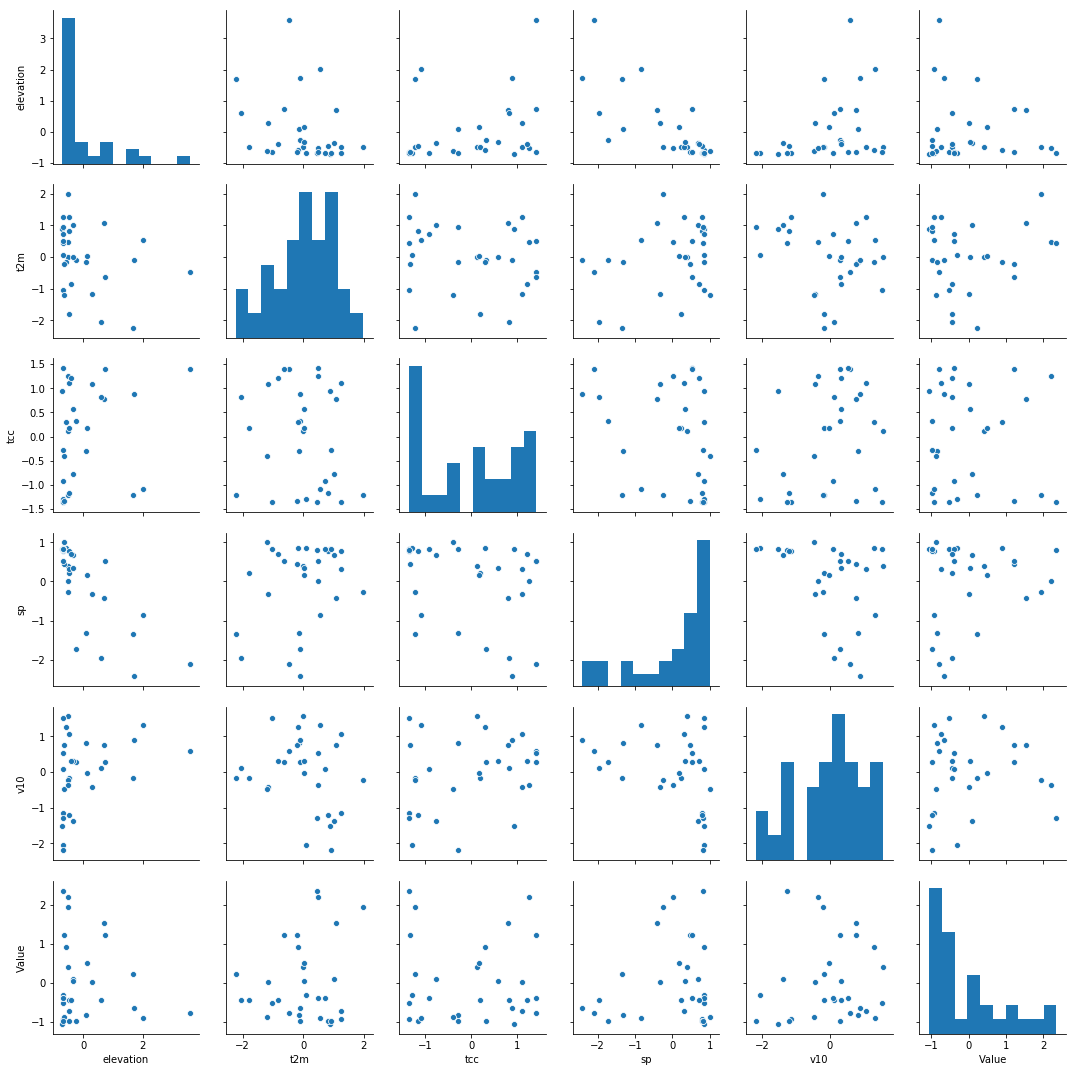

In [121]:
sns.pairplot(chillies)

In [122]:
model = sm.formula.ols('Value ~ elevation + t2m + tcc + sp + v10', data=chillies)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.2662
Date:                Wed, 03 Apr 2019   Prob (F-statistic):              0.927
Time:                        12:58:52   Log-Likelihood:                -43.183
No. Observations:                  31   AIC:                             98.37
Df Residuals:                      25   BIC:                             107.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.195  -4.98e-16      1.000      -0.401       0.401
elevation     -0.0391      0.302     -0.129      0.898      -0.662       0.584
t2m            0.1294      0.207      0.624      0.538      -0.298       0.557
tcc           -0.0055      0.207     -0.027      0.979      -0.431       0.420
sp             0.1249      0.308      0.405      0.689      -0.510       0.760
v10            0.1403      0.214      0.656      0.518      -0.300       0.580
==============================================================================
Omnibus:                        4.740   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.151
Skew:                           0.892   Prob(JB):                        0.125
Kurtosis:                       2.816   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

E:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


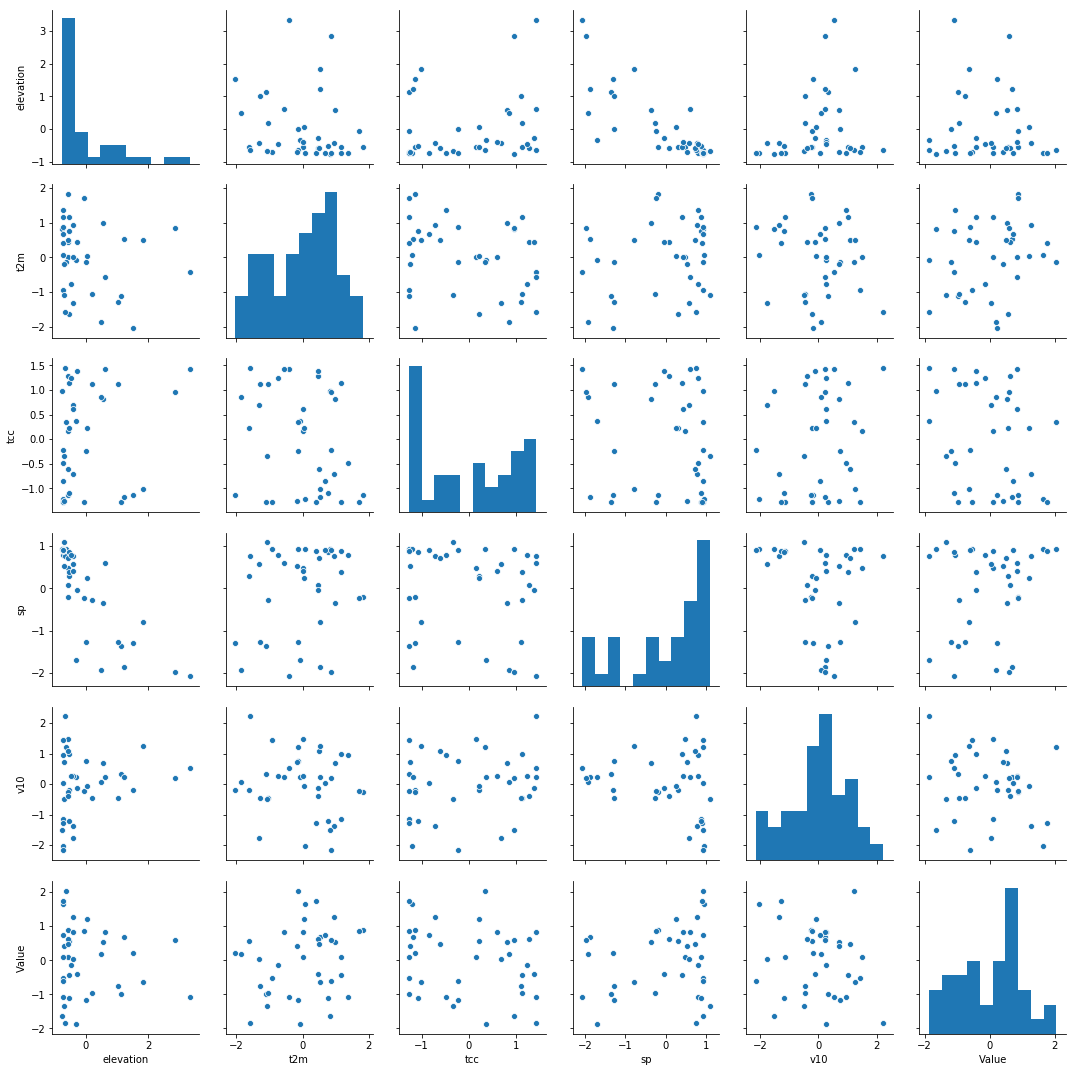

In [123]:
onions = Crop_std(Item_name ='Onions, dry')
sns.pairplot(onions)

In [124]:
model = sm.formula.ols('Value ~ elevation + t2m + tcc + sp + v10', data=onions)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.003
Date:                Wed, 03 Apr 2019   Prob (F-statistic):              0.431
Time:                        13:01:45   Log-Likelihood:                -52.579
No. Observations:                  39   AIC:                             117.2
Df Residuals:                      33   BIC:                             127.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.162  -5.99e-16      1.000      -0.330       0.330
elevation      0.2261      0.274      0.825      0.415      -0.332       0.784
t2m            0.1376      0.171      0.803      0.428      -0.211       0.486
tcc           -0.1887      0.171     -1.103      0.278      -0.537       0.159
sp             0.3007      0.275      1.094      0.282      -0.259       0.860
v10           -0.1026      0.168     -0.612      0.545      -0.443       0.238
==============================================================================
Omnibus:                        1.441   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.088
Skew:                          -0.143   Prob(JB):                        0.580
Kurtosis:                       2.233   Cond. No.                         3.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

E:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


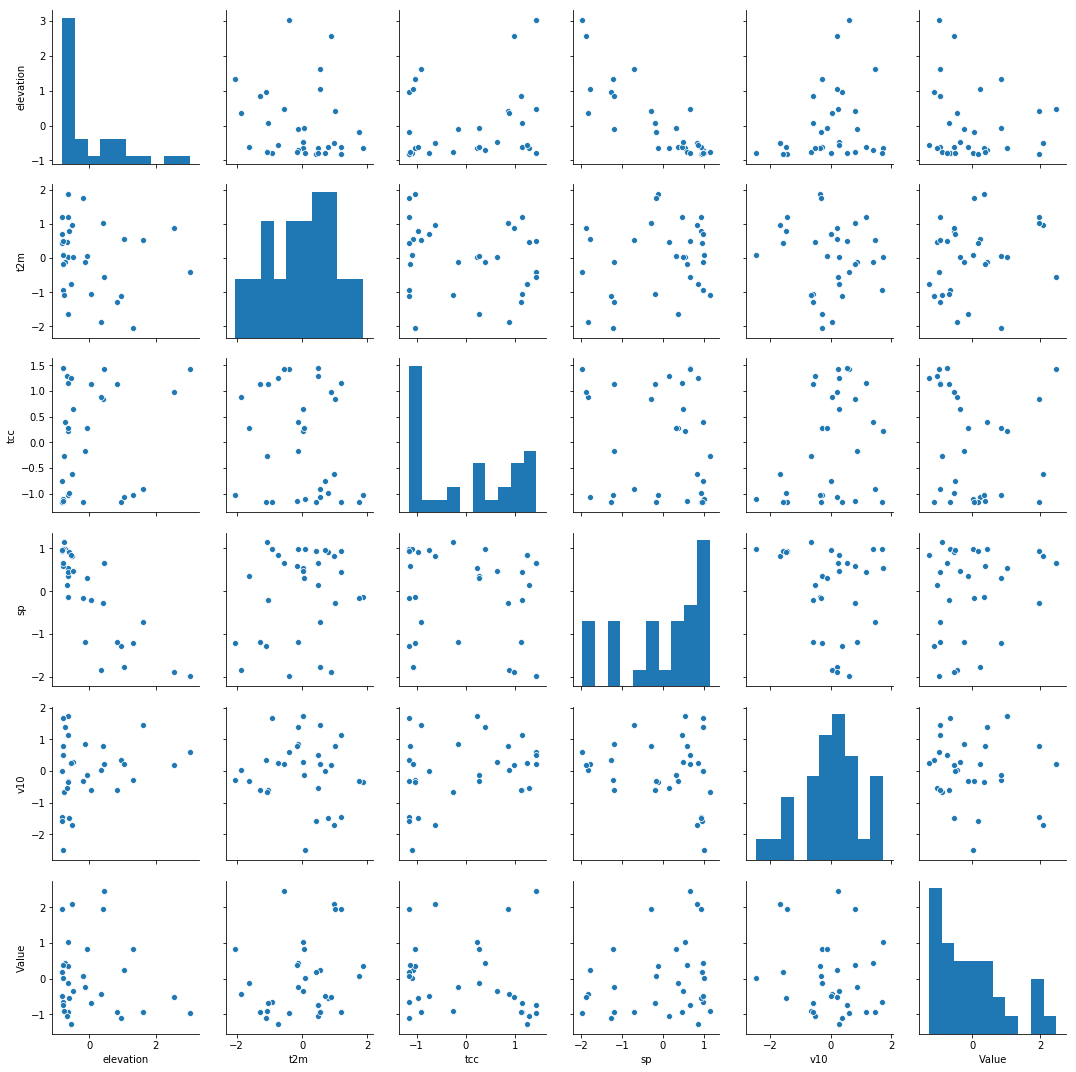

In [125]:
watermelons = Crop_std(Item_name ='Watermelons')
sns.pairplot(watermelons )

In [126]:
model = sm.formula.ols('Value ~ elevation + t2m + tcc + sp + v10', data=watermelons)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.7020
Date:                Wed, 03 Apr 2019   Prob (F-statistic):              0.627
Time:                        13:08:47   Log-Likelihood:                -43.380
No. Observations:                  32   AIC:                             98.76
Df Residuals:                      26   BIC:                             107.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0      0.184          0      1.000      -0.378       0.378
elevation      0.2314      0.346      0.670      0.509      -0.479       0.942
t2m            0.1736      0.192      0.903      0.375      -0.221       0.569
tcc           -0.1023      0.197     -0.519      0.608      -0.508       0.303
sp             0.3426      0.346      0.991      0.331      -0.368       1.054
v10           -0.0901      0.194     -0.464      0.646      -0.489       0.309
==============================================================================
Omnibus:                        4.256   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.708
Skew:                           0.828   Prob(JB):                        0.157
Kurtosis:                       2.798   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""